In [1]:
# 데이터분석 라이브러리 pandas 가져와 pd로 축약어 사용
import pandas as pd
# 배열 연산 라이브러리 numpy 가져와 np로 축약어 사용
import numpy as np
# 그래프 그리는 라이브러리 matplotlib 중 일부 가져오기
import matplotlib.pyplot as plt

In [ ]:
# pandas Series 실행해보기
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [ ]:
s

In [2]:
# pandas DataFrame 사용하기
dates = pd.date_range('20300101', periods=6)
dates 

DatetimeIndex(['2030-01-01', '2030-01-02', '2030-01-03', '2030-01-04',
               '2030-01-05', '2030-01-06'],
              dtype='datetime64[ns]', freq='D')

In [3]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2030-01-01,-1.027766,-0.595432,-0.023717,-0.975218
2030-01-02,0.668452,-1.396817,0.451586,1.613392
2030-01-03,0.585557,0.601437,-0.623310,-0.413874
2030-01-04,-0.623264,-0.128100,2.029726,0.640683
2030-01-05,-1.236510,0.290411,0.070861,-1.003233
2030-01-06,-1.085668,0.049273,1.666194,1.261022


In [ ]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20300102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'
                   })
df2

In [ ]:
df2.dtypes

In [ ]:
dir(df2)

In [ ]:
# 첫 5개 행의 데이터를 보여줍니다.
df.head()

In [ ]:
# 마지막 3개 행의 데이터를 보여줍니다.
df.tail(3)

In [ ]:
# DataFrame의 인덱스를 보기
df.index

In [ ]:
# 컬럼을 보기.
df.columns

In [ ]:
# numpy 데이터 살펴보기.
df.values

In [ ]:
# DataFrame의 간단한 통계 정보
df.describe()

In [ ]:
# 열과 행을 바꾼 형태의 DataFrame
df.T

In [ ]:
# 행과 열 이름을 정렬해보자.
# axis=0은 인덱스, axis=1은 컬럼 기준
# ascending=True는 오름차순, False는 내림차순
df. sort_index(axis=1, ascending=False)

In [ ]:
# DataFrame 내부 값으로 정렬하기.
df. sort_values(by='B')

In [ ]:
df. sort_values(by='B', ascending=False)

In [4]:
df['A']

2030-01-01   -1.027766
2030-01-02    0.668452
2030-01-03    0.585557
2030-01-04   -0.623264
2030-01-05   -1.236510
2030-01-06   -1.085668
Freq: D, Name: A, dtype: float64

In [5]:
type(df['A'])

pandas.core.series.Series

In [6]:
# 맨 처음 3개의 행을 가져옵니다.
df[0:3]

,A,B,C,D
2030-01-01,-1.027766,-0.595432,-0.023717,-0.975218
2030-01-02,0.668452,-1.396817,0.451586,1.613392
2030-01-03,0.585557,0.601437,-0.623310,-0.413874


In [7]:
# 인덱스명에 해당하는 값을 가져온다.
df['20300102': '20300104']

,A,B,C,D
2030-01-02,0.668452,-1.396817,0.451586,1.613392
2030-01-03,0.585557,0.601437,-0.623310,-0.413874
2030-01-04,-0.623264,-0.128100,2.029726,0.640683


In [8]:
# 이름을 이용해 선택하기 .loc
df.loc[dates[0]]

A   -1.027766
B   -0.595432
C   -0.023717
D   -0.975218
Name: 2030-01-01 00:00:00, dtype: float64

In [9]:
# 여러 칼럼 가져오기?
df.loc[:, ['A', 'B']]

,A,B
2030-01-01,-1.027766,-0.595432
2030-01-02,0.668452,-1.396817
2030-01-03,0.585557,0.601437
2030-01-04,-0.623264,-0.128100
2030-01-05,-1.236510,0.290411
2030-01-06,-1.085668,0.049273


In [10]:
# 원하는 구간 가져오기
df.loc['20300102':'20300104', ['A','B']]

,A,B
2030-01-02,0.668452,-1.396817
2030-01-03,0.585557,0.601437
2030-01-04,-0.623264,-0.128100


In [11]:
# 특정 인덱스값의 칼럼 'A','B' 가져오기
df.loc[dates[0], ['A','B']]

A   -1.027766
B   -0.595432
Name: 2030-01-01 00:00:00, dtype: float64

In [12]:
# 특정 인덱스 값과 특정 칼럼에 있는 값 가져오기
# df.loc[dates[0], 'A']
df.at[dates[0], 'A']

-1.0277659810520676

In [14]:
# 위치를 이용해 선택하기
df.iloc[3] # 0 1 2 3 4개 추출.

A   -0.623264
B   -0.128100
C    2.029726
D    0.640683
Name: 2030-01-04 00:00:00, dtype: float64

In [15]:
# 위치를 이용해 범위 선택하기
df.iloc[3:5, 0:2]

,A,B
2030-01-04,-0.623264,-0.128100
2030-01-05,-1.236510,0.290411


In [16]:
# 행과 열의 인덱스로 리스트에 넘겨주기.
# 2, 3, 5 행 + 1, 3 열
df.iloc[[1,2,4], [0,2]]

,A,C
2030-01-02,0.668452,0.451586
2030-01-03,0.585557,-0.623310
2030-01-05,-1.236510,0.070861


In [17]:
# : -> 열이나 행 전체를 가져오는 기호
df.iloc[1:3, :]

,A,B,C,D
2030-01-02,0.668452,-1.396817,0.451586,1.613392
2030-01-03,0.585557,0.601437,-0.623310,-0.413874


In [18]:
df.iloc[:, 1:3]

,B,C
2030-01-01,-0.595432,-0.023717
2030-01-02,-1.396817,0.451586
2030-01-03,0.601437,-0.623310
2030-01-04,-0.128100,2.029726
2030-01-05,0.290411,0.070861
2030-01-06,0.049273,1.666194


In [19]:
# 값 하나를 선택하자
# 특정 행과 열을 지정.
df.iloc[1,1]

-1.3968168476104643

In [20]:
df.iat[1,1]

-1.3968168476104643

In [21]:
# 조건을 이용하기
# A라는 열에 들어있는 값이 양수인 경우에 해당하는 행 선택
df[df.A > 0]

,A,B,C,D
2030-01-02,0.668452,-1.396817,0.451586,1.613392
2030-01-03,0.585557,0.601437,-0.623310,-0.413874


In [22]:
df[df > 0]

,A,B,C,D
2030-01-01,NaN,NaN,NaN,NaN
2030-01-02,0.668452,NaN,0.451586,1.613392
2030-01-03,0.585557,0.601437,NaN,NaN
2030-01-04,NaN,NaN,2.029726,0.640683
2030-01-05,NaN,0.290411,0.070861,NaN
2030-01-06,NaN,0.049273,1.666194,1.261022


In [24]:
# 필터링 isin()
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four','three',]
df2

,A,B,C,D,E
2030-01-01,-1.027766,-0.595432,-0.023717,-0.975218,one
2030-01-02,0.668452,-1.396817,0.451586,1.613392,one
2030-01-03,0.585557,0.601437,-0.623310,-0.413874,two
2030-01-04,-0.623264,-0.128100,2.029726,0.640683,three
2030-01-05,-1.236510,0.290411,0.070861,-1.003233,four
2030-01-06,-1.085668,0.049273,1.666194,1.261022,three


In [25]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2030-01-03,0.585557,0.601437,-0.623310,-0.413874,two
2030-01-05,-1.236510,0.290411,0.070861,-1.003233,four


In [27]:
# 데이터 변경하기
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20300101', periods=6))
s1

2030-01-01    1
2030-01-02    2
2030-01-03    3
2030-01-04    4
2030-01-05    5
2030-01-06    6
Freq: D, dtype: int64

In [28]:
df['F']=s1
df

,A,B,C,D,F
2030-01-01,-1.027766,-0.595432,-0.023717,-0.975218,1
2030-01-02,0.668452,-1.396817,0.451586,1.613392,2
2030-01-03,0.585557,0.601437,-0.623310,-0.413874,3
2030-01-04,-0.623264,-0.128100,2.029726,0.640683,4
2030-01-05,-1.236510,0.290411,0.070861,-1.003233,5
2030-01-06,-1.085668,0.049273,1.666194,1.261022,6


In [29]:
# 특정값 하나를 선택해 다른 값으로 바꾸기
df.at[dates[0], 'A'] = 0
# df.iat[0,1] = 0 와 같은 명령이다.
df

,A,B,C,D,F
2030-01-01,0.000000,-0.595432,-0.023717,-0.975218,1
2030-01-02,0.668452,-1.396817,0.451586,1.613392,2
2030-01-03,0.585557,0.601437,-0.623310,-0.413874,3
2030-01-04,-0.623264,-0.128100,2.029726,0.640683,4
2030-01-05,-1.236510,0.290411,0.070861,-1.003233,5
2030-01-06,-1.085668,0.049273,1.666194,1.261022,6


In [30]:
# 한번에 여러 데이터 바꾸기
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2030-01-01,0.000000,-0.595432,-0.023717,5,1
2030-01-02,0.668452,-1.396817,0.451586,5,2
2030-01-03,0.585557,0.601437,-0.623310,5,3
2030-01-04,-0.623264,-0.128100,2.029726,5,4
2030-01-05,-1.236510,0.290411,0.070861,5,5
2030-01-06,-1.085668,0.049273,1.666194,5,6


In [32]:
# 음수만을 결과값으로 가지는 데이터 프레임
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2030-01-01,0.000000,-0.595432,-0.023717,-5,-1
2030-01-02,-0.668452,-1.396817,-0.451586,-5,-2
2030-01-03,-0.585557,-0.601437,-0.623310,-5,-3
2030-01-04,-0.623264,-0.128100,-2.029726,-5,-4
2030-01-05,-1.236510,-0.290411,-0.070861,-5,-5
2030-01-06,-1.085668,-0.049273,-1.666194,-5,-6


In [35]:
# 결측치 = missing data
# np.nan -> Pandas는 연산에서 제외한다.
# 재인덱싱(reindex)은 해당 축에 대해 인덱스를 변경/ 추가/ 삭제를 하게 됩니다.
# 이는 복사한 데이터프레임을 반환합니다.

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2030-01-01,0.000000,-0.595432,-0.023717,5,1,1.0
2030-01-02,0.668452,-1.396817,0.451586,5,2,1.0
2030-01-03,0.585557,0.601437,-0.623310,5,3,NaN
2030-01-04,-0.623264,-0.128100,2.029726,5,4,NaN


In [36]:
# 결측치 존재하면 다버리는 dropna
df1.dropna(how='any')

,A,B,C,D,F,E
2030-01-01,0.000000,-0.595432,-0.023717,5,1,1.0
2030-01-02,0.668452,-1.396817,0.451586,5,2,1.0


In [39]:
# 결측치 존재하면 다른거로 채우는 fillna
df1.fillna(value=5)

,A,B,C,D,F,E
2030-01-01,0.000000,-0.595432,-0.023717,5,1,1.0
2030-01-02,0.668452,-1.396817,0.451586,5,2,1.0
2030-01-03,0.585557,0.601437,-0.623310,5,3,5.0
2030-01-04,-0.623264,-0.128100,2.029726,5,4,5.0


In [40]:
# 해당 값이 결측치인지 확인하는 isna
pd.isna(df1)

,A,B,C,D,F,E
2030-01-01,False,False,False,False,False,False
2030-01-02,False,False,False,False,False,False
2030-01-03,False,False,False,False,False,True
2030-01-04,False,False,False,False,False,True


In [41]:
# 연산
# 행으로 평균 구하기
df.mean()

A   -0.281906
B   -0.196538
C    0.595224
D    5.000000
F    3.500000
dtype: float64

In [42]:
# 열을 (=인덱스를)기준으로 평균 구하기
df.mean(1)

2030-01-01    1.076170
2030-01-02    1.344644
2030-01-03    1.712737
2030-01-04    2.055673
2030-01-05    1.824952
2030-01-06    2.325960
Freq: D, dtype: float64

In [44]:
# 차원이 달라 인덱스를 맞춰야하는 두 오브젝트 간 연산 예제.
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s 

2030-01-01    NaN
2030-01-02    NaN
2030-01-03    1.0
2030-01-04    3.0
2030-01-05    5.0
2030-01-06    NaN
Freq: D, dtype: float64

In [45]:
df.sub(s, axis='index')

,A,B,C,D,F
2030-01-01,NaN,NaN,NaN,NaN,NaN
2030-01-02,NaN,NaN,NaN,NaN,NaN
2030-01-03,-0.414443,-0.398563,-1.623310,4.0,2.0
2030-01-04,-3.623264,-3.128100,-0.970274,2.0,1.0
2030-01-05,-6.236510,-4.709589,-4.929139,0.0,0.0
2030-01-06,NaN,NaN,NaN,NaN,NaN


In [46]:
# 데이터프레임에 함수 적용하기.
df.apply(np.cumsum)

,A,B,C,D,F
2030-01-01,0.000000,-0.595432,-0.023717,5,1
2030-01-02,0.668452,-1.992249,0.427869,10,3
2030-01-03,1.254009,-1.390812,-0.195440,15,6
2030-01-04,0.630746,-1.518912,1.834286,20,10
2030-01-05,-0.605765,-1.228501,1.905147,25,15
2030-01-06,-1.691433,-1.179228,3.571342,30,21


In [47]:
df

,A,B,C,D,F
2030-01-01,0.000000,-0.595432,-0.023717,5,1
2030-01-02,0.668452,-1.396817,0.451586,5,2
2030-01-03,0.585557,0.601437,-0.623310,5,3
2030-01-04,-0.623264,-0.128100,2.029726,5,4
2030-01-05,-1.236510,0.290411,0.070861,5,5
2030-01-06,-1.085668,0.049273,1.666194,5,6


In [48]:
df.apply(lambda x: x.max() - x.min())

A    1.904962
B    1.998254
C    2.653036
D    0.000000
F    5.000000
dtype: float64

<AxesSubplot:>

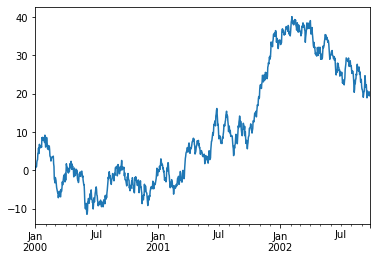

In [52]:
# plot 으로 그래프 그리기
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()